In [ ]:
pip install opencv-python tensorflow fastapi uvicorn streamlit kaggle matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install gradio

In [1]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d asdasdasasdas/garbage-classification
!unzip garbage-classification.zip -d garbage_data

Streaming output truncated to the last 5000 lines.
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: garbage_data/Garbage classif

In [ ]:
import os
base_dir="/content/garbage_data/Garbage classification/Garbage classification"
print("Classes available:", os.listdir(base_dir))

Classes available: ['plastic', 'trash', 'cardboard', 'metal', 'paper', 'glass']


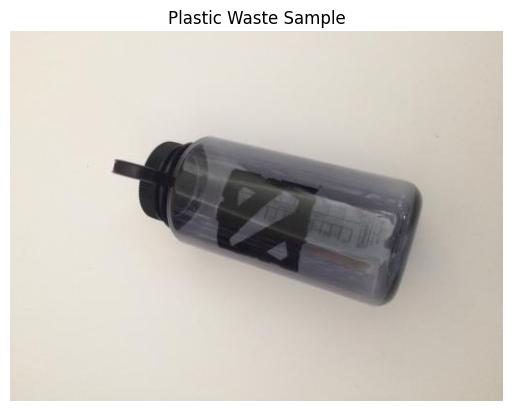

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = f'{base_dir}/plastic/plastic1.jpg'
image = cv2.imread(image_path)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Plastic Waste Sample")
plt.axis('off')
plt.show()

In [ ]:
import os
classes =os.listdir(base_dir)
for cls in classes:
  path=os.path.join(base_dir,cls)
  count=len(os.listdir(path))
  print(f"Number of {cls} images: {count} images")

Number of plastic images: 482 images
Number of trash images: 137 images
Number of cardboard images: 403 images
Number of metal images: 410 images
Number of paper images: 594 images
Number of glass images: 501 images


In [ ]:
import tensorflow as tf
IMG_SIZE=128
BATCH_SIZE=32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [ ]:
import tensorflow as tf

AUTOTUNE=tf.data.AUTOTUNE
IMG_SIZE=128
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 167ms/step - accuracy: 0.3685 - loss: 1.7189 - val_accuracy: 0.5683 - val_loss: 1.1989
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5187 - loss: 1.2293 - val_accuracy: 0.5782 - val_loss: 1.1209
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5866 - loss: 1.1007 - val_accuracy: 0.6000 - val_loss: 1.0457
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6155 - loss: 1.0187 - val_accuracy: 0.6139 - val_loss: 1.0244
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6484 - loss: 0.9520 - val_accuracy: 0.6079 - val_loss: 1.0215
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6463 - loss: 0.9350 - val_accuracy: 0.6337 - val_loss: 0.9579
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6720 - loss: 0.8634 - val_accuracy: 0.6337 - val_loss: 0.9566
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6974 - loss: 0.8356 - val_accuracy: 0.6495 - val_loss: 

In [ ]:
model.save('garbage_classification_model.h5')

In [ ]:
from google.colab import files
files.download("garbage_classification_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('garbage_classification_model.h5')

Saving depositphotos_5667025-stock-photo-glass-bottle.jpg to depositphotos_5667025-stock-photo-glass-bottle.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


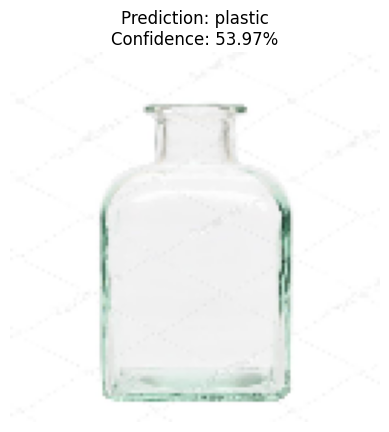

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2

model=tf.keras.models.load_model('garbage_classification_model.h5')
classes=['cardboard','glass','metal','paper','plastic','trash']
from google.colab import files
uploaded=files.upload()
img=image.load_img(next(iter(uploaded)),target_size=(128,128))
img_array=image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
prediction=model.predict(img_array)
predicted_class=classes[np.argmax(prediction)]
confidence=np.max(prediction)
#Display
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()

In [ ]:
!mkdir dustbins
!wget -O dustbins/cardboard.jpg "https://cdn-icons-png.flaticon.com/512/1048/1048942.png"
!wget -O dustbins/glass.jpg "https://cdn-icons-png.flaticon.com/512/1048/1048947.png"
!wget -O dustbins/metal.jpg "https://cdn-icons-png.flaticon.com/512/1048/1048951.png"
!wget -O dustbins/paper.jpg "https://cdn-icons-png.flaticon.com/512/1048/1048954.png"
!wget -O dustbins/plastic.jpg "https://cdn-icons-png.flaticon.com/512/1048/1048957.png"
!wget -O dustbins/trash.jpg "https://cdn-icons-png.flaticon.com/512/1048/1048960.png"


--2025-08-04 04:58:00--  https://cdn-icons-png.flaticon.com/512/1048/1048942.png
Resolving cdn-icons-png.flaticon.com (cdn-icons-png.flaticon.com)... 23.61.246.203, 23.61.246.219, 2600:1406:5e00:4f::1720:98f2, ...
Connecting to cdn-icons-png.flaticon.com (cdn-icons-png.flaticon.com)|23.61.246.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29614 (29K) [image/png]
Saving to: ‘dustbins/cardboard.jpg’

dustbins/cardboard. 100%[===================>]  28.92K  --.-KB/s    in 0.1s    

2025-08-04 04:58:01 (199 KB/s) - ‘dustbins/cardboard.jpg’ saved [29614/29614]

--2025-08-04 04:58:01--  https://cdn-icons-png.flaticon.com/512/1048/1048947.png
Resolving cdn-icons-png.flaticon.com (cdn-icons-png.flaticon.com)... 23.61.246.203, 23.61.246.219, 2600:1406:5e00:4f::1720:98f2, ...
Connecting to cdn-icons-png.flaticon.com (cdn-icons-png.flaticon.com)|23.61.246.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27572 (27K) [image/png]
Saving to: 

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# Load trained model
model = tf.keras.models.load_model('garbage_classification_model.h5')

# Waste categories
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Local dustbin images
dustbin_images = {
    "cardboard": "/content/dustbins/cardboard.jpg",
    "glass": "/content/dustbins/glass.jpg",
    "metal": "/content/dustbins/metal.jpg",
    "paper": "/content/dustbins/paper.jpg",
    "plastic": "/content/dustbins/plastic.jpg",
    "trash": "/content/dustbins/trash.jpg"
}

# Prediction function
def classify_waste(img):
    # Preprocess image
    img_resized = cv2.resize(img, (128, 128))
    img_array = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]
    confidence = float(np.max(prediction))

    # Load dustbin image from local folder
    dustbin_img = cv2.imread(dustbin_images[predicted_class])
    dustbin_img = cv2.cvtColor(dustbin_img, cv2.COLOR_BGR2RGB)

    # Return in Gradio-compatible format
    return {predicted_class: confidence}, dustbin_img


# Build Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# 🗑 Garbage Classification with Dustbin Suggestion")
    gr.Markdown("Upload an image of waste and get the correct dustbin category.")

    with gr.Row():
        input_img = gr.Image(type="numpy", label="Upload Waste Image")
        output_label = gr.Label(label="Prediction")

    dustbin_output = gr.Image(type="numpy", label="Suggested Dustbin")

    classify_btn = gr.Button("Classify Waste")

    classify_btn.click(
        fn=classify_waste,
        inputs=input_img,
        outputs=[output_label, dustbin_output]
    )

demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f0e8c13f3be5f2d5e4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
